Loaded 500 samples from data/ECG5000/ECG5000_TRAIN.ts
Loaded 4500 samples from data/ECG5000/ECG5000_TEST.ts
Shape of X_train: torch.Size([942, 139])
Shape of y_train: torch.Size([942])
Shape of X_test: torch.Size([4500, 139])
Shape of y_test: torch.Size([4500])


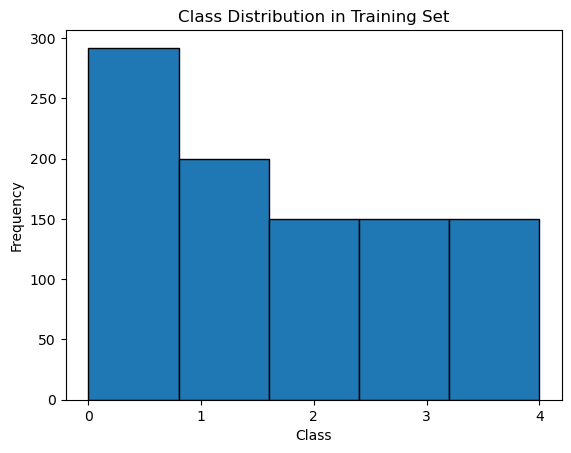

C:\Users\vmadhuu\AppData\Local\anaconda3\envs\tscproj\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100], Loss: 1.1475, Training Accuracy: 53.18%
Validation Loss: 1.1246, Validation Accuracy: 66.87%
Epoch [2/100], Loss: 0.7700, Training Accuracy: 68.05%
Validation Loss: 0.3241, Validation Accuracy: 92.16%
Epoch [3/100], Loss: 0.6568, Training Accuracy: 75.05%
Validation Loss: 0.2752, Validation Accuracy: 93.60%
Epoch [4/100], Loss: 0.5786, Training Accuracy: 78.66%
Validation Loss: 0.3227, Validation Accuracy: 92.22%
Epoch [5/100], Loss: 0.5167, Training Accuracy: 79.30%
Validation Loss: 0.2728, Validation Accuracy: 92.84%
Epoch [6/100], Loss: 0.4671, Training Accuracy: 82.70%
Validation Loss: 0.2566, Validation Accuracy: 93.40%
Epoch [7/100], Loss: 0.4397, Training Accuracy: 83.76%
Validation Loss: 0.2779, Validation Accuracy: 92.29%
Epoch [8/100], Loss: 0.4111, Training Accuracy: 85.46%
Validation Loss: 0.2474, Validation Accuracy: 93.22%
Epoch [9/100], Loss: 0.4126, Training Accuracy: 85.14%
Validation Loss: 0.2759, Validation Accuracy: 92.69%
Epoch [10/100], Loss: 0.3690

C:\Users\vmadhuu\AppData\Local\anaconda3\envs\tscproj\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.31635191522433725, 93.6)

In [1]:
# Import necessary libraries
import numpy as np
import torch
from vtbench.data_utils import read_ucr, normalize_data, apply_smote, to_torch_tensors

from vtbench.models.CNN import Simple2DCNN
from vtbench.models.MLP import MLP
from vtbench.models.RNN import RNN
from vtbench.models.Transformer import TransformerModel
from vtbench.models.TCN import Small_TCN

from vtbench.CNN_train import create_dataloaders, train_model, evaluate_model, plot_class_distribution
# from vtbench.TCN_train import create_dataloaders, train_model, evaluate_model, plot_class_distribution
# from vtbench.MLP_train import create_dataloaders, train_model, evaluate_model, plot_class_distribution
# from vtbench.RNN_train import create_dataloaders, train_model, evaluate_model, plot_class_distribution
# from vtbench.Transformer_train import create_dataloaders, train_model, evaluate_model, plot_class_distribution


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# File paths
train_file = 'data/ECG5000/ECG5000_TRAIN.ts'
test_file = 'data/ECG5000/ECG5000_TEST.ts'

# Load datasets
x_train, y_train = read_ucr(train_file)
x_test, y_test = read_ucr(test_file)

# Normalize labels to be within range [0, num_classes-1]
unique_labels = np.unique(y_train)
label_map = {label: idx for idx, label in enumerate(unique_labels)}
y_train = np.array([label_map[label] for label in y_train])
y_test = np.array([label_map[label] for label in y_test])

nb_classes = len(unique_labels)

# Normalize features
x_train, x_test = normalize_data(x_train, x_test)

# Apply SMOTE with custom sampling strategy to training data
desired_samples_per_class = {  
    1: 200,
    2: 150,
    3: 150,
    4: 150
}
x_train_resampled, y_train_resampled = apply_smote(x_train, y_train, desired_samples_per_class)

# Convert to PyTorch tensors
X_train, y_train, X_test, y_test = to_torch_tensors(x_train_resampled, y_train_resampled, x_test, y_test)


print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


# Create DataLoaders
train_loader, val_loader, test_loader = create_dataloaders(X_train, y_train, X_test, y_test)

# Plot class distribution
plot_class_distribution(y_train, nb_classes)



# Initialize 2DCNN model
model = Simple2DCNN(3, nb_classes).to(device)  


# # TCN model
# # Ensure the input tensors are 3D with shape [batch_size, seq_length, input_size]
# X_train = X_train.unsqueeze(1)  # Shape: (batch_size, 1, sequence_length)
# X_test = X_test.unsqueeze(1) 

# print(f"Shape of X_train: {X_train.shape}")
# print(f"Shape of X_test: {X_test.shape}")

# num_inputs = 1
# num_channels = 11
# model = Small_TCN(num_inputs, num_channels, nb_classes).to(device)


# # Initialize RNN model
# num_inputs = 1  # For numerical data
# num_channels = 11
# nb_classes = 5
# input_size = X_train.shape[-1]  # seq_length
# hidden_size = 100
# num_layers = 2

# model = RNN(input_size=num_inputs, hidden_size=hidden_size, num_layers=num_layers, num_classes=nb_classes).to(device)



# # Initialize MLP model
# X_train = X_train.view(X_train.size(0), -1)
# X_test = X_test.view(X_test.size(0), -1)

# input_size = X_train.shape[1]
# hidden_size = 100
# num_classes = nb_classes
# model = MLP(input_size, hidden_size, num_classes).to(device)



# Initialize Transformer model
# input_size = X_train.shape[2]
# num_layers = 2
# num_classes = nb_classes
# model = TransformerModel(input_size, num_classes).to(device) 

# Train the model
num_epochs = 100
train_model(model, train_loader, val_loader, num_epochs)

# Evaluate the model
evaluate_model(model, test_loader)
